In [1]:
%cd ../../

/mnt/sda/otani/Experiments/eval-detection


In [40]:
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from collections import Counter
from cvxopt import matrix, solvers

ModuleNotFoundError: No module named 'scipy.stats.sampling'

In [3]:
dataset = json.load(open("data/coco/annotations/instances_val2017.json", "r"))

In [4]:
cat_id2idx = {c["id"]:i for i, c in enumerate(dataset["categories"])}
img_id2idx = {c["id"]:i for i, c in enumerate(dataset["images"])}

<BarContainer object of 80 artists>

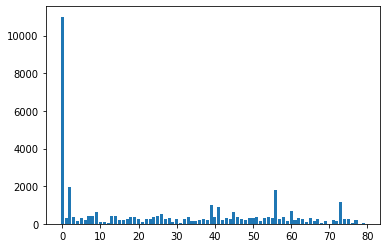

In [5]:
cats = []
for ann in dataset["annotations"]:
    c_id = ann["category_id"]
    cats.append(cat_id2idx[c_id])
c = Counter(cats)
x = []
y = []
for c_idx, freq in c.items():
    x.append(c_idx)
    y.append(freq)
plt.bar(x, y)

In [24]:
n_cat = len(dataset["categories"])
n_img = len(dataset["images"])

E = np.zeros((n_img, n_cat))
for ann in dataset["annotations"]:
    c_id = ann["category_id"]
    img_id = ann["image_id"]
    E[img_id2idx[img_id], cat_id2idx[c_id]] = 1

A_ = 2 * n_cat * np.eye(n_cat) - 2 * np.ones((n_cat, n_cat))
A = E @ A_ @ E.T

In [25]:
alpha = 0.0
P = matrix(A)
q = matrix(1., (n_img, 1))
G = matrix(-np.eye(n_img))
h = matrix(-alpha, (n_img, 1))
A = matrix(1.0, (1, n_img))
b = matrix(1.0)
sol=solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  1.0000e+00 -2.0700e-03  5e+03  7e+01  1e+00
 1:  1.0000e+00 -7.4293e-04  6e+01  8e-01  1e-02
 2:  1.0005e+00  1.0107e-01  5e+00  6e-02  9e-04
 3:  1.0079e+00  4.8306e-01  2e+00  2e-02  3e-04
 4:  1.0120e+00  5.8158e-01  2e+00  2e-02  2e-04
 5:  1.0152e+00  6.4028e-01  1e+00  9e-03  1e-04
 6:  1.0237e+00  6.9383e-01  6e-01  3e-03  4e-05
 7:  1.0161e+00  9.2253e-01  1e-01  4e-04  6e-06
 8:  1.0050e+00  9.8798e-01  2e-02  3e-05  1e-06
 9:  1.0009e+00  9.9843e-01  2e-03  1e-17  2e-15
10:  1.0001e+00  9.9985e-01  3e-04  9e-16  7e-07
11:  1.0000e+00  9.9998e-01  4e-05  9e-16  2e-15
12:  1.0000e+00  1.0000e+00  6e-06  1e-15  2e-15
13:  1.0000e+00  1.0000e+00  8e-07  1e-15  5e-08
Optimal solution found.


In [26]:
sol

{'x': <5000x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 's': <5000x1 matrix, tc='d'>,
 'z': <5000x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 8.390472399113086e-07,
 'relative gap': 8.390476083779886e-07,
 'primal objective': 1.0000003998985225,
 'dual objective': 0.9999995608512839,
 'primal infeasibility': 1.3322676295501878e-15,
 'dual infeasibility': 4.978766957527404e-08,
 'primal slack': 2.298542234343768e-08,
 'dual slack': 7.732882254807809e-10,
 'iterations': 13}

<BarContainer object of 5000 artists>

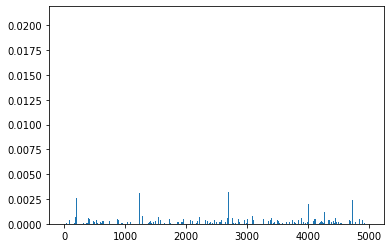

In [45]:
x = np.array(sol["x"])
plt.bar(np.arange(n_img), x.ravel())

In [51]:
x.sum()

0.9999999999999996

<BarContainer object of 5000 artists>

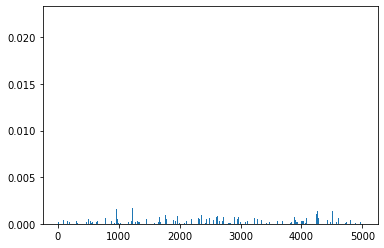

In [54]:
n_draw = 10000
freq_img = np.random.multinomial(n_draw, x.ravel())
plt.bar(np.arange(n_img), freq_img / n_draw)